## Overview

The client -**The Greek Michigan** - operates a real estate agency in the US. The client is looking to build a reliable system which helps in determining property adjustments when appraising single-family real estate. 

Each of the properies has some of the relevant characterics such as Size (Above Ground Living Area), Site Size, Above Ground Bedroom Count,Full Bathroom Count,Half Bathroom Count,Age of the property,Swimming Pool (Above Ground & Inground)
Waterfront Site,Basement Walkout,Distressed Properties (Not Privately Owned),Market Conditions (Month of Sales Contract) and a few other.

Using propery data, we need to answer some of the below questions.

Does a feature affect value of propery? If it does, is the contribution statistically significant?
Also, whether the feature and propery price are correlated? Some of the key statistics of the feature - Min, Median/Mean and Max
How to visualize stats and information for the client to use in decision making?



### Read data

In [8]:
import pandas as pd
realestate2 = pd.read_csv("C:\\Ram\\Upwork\\Project - Online Real Estate Analysis Tool\\input_data_2_branches.csv")

In [9]:
# see the data
realestate2.head()

,Locality,Close_Date,ClosePrice,Acreage,ArchitectureLevel,BasementType,Basement_YN,Baths_Full,Baths_Half,Beds_Total,...,Garage_YN,Out_Buildings,Ownership,Pool_YN,Seller_Concession_Amount,Seller_Concession_YN,Water_Frontage_Feet,Waterfront_YN,Year_Built,Year_Remodeled
0,Brick Ranch,5/12/2017,176000.0,0.21,1 Story,Finished,True,1,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1969,NaN
1,Brick Ranch,7/24/2017,140000.0,0.17,1 Story,Finished,True,1,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1960,NaN
2,Brick Ranch,7/24/2017,165000.0,0.18,1 Story,Finished,True,2,0,4,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1956,NaN
3,Brick Ranch,7/24/2017,171000.0,0.19,1 Story,Finished,True,1,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1969,NaN
4,Brick Ranch,7/24/2017,200000.0,0.17,1 Story,Finished,True,1,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1966,NaN


In [10]:
realestate2.tail()

,Locality,Close_Date,ClosePrice,Acreage,ArchitectureLevel,BasementType,Basement_YN,Baths_Full,Baths_Half,Beds_Total,...,Garage_YN,Out_Buildings,Ownership,Pool_YN,Seller_Concession_Amount,Seller_Concession_YN,Water_Frontage_Feet,Waterfront_YN,Year_Built,Year_Remodeled
3019,Macomb,7/17/2020,692559.0,0.00,1 Story,Daylight,True,2,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,2019,NaN
3020,Macomb,7/20/2020,360000.0,0.19,1 Story,Unfinished,True,2,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1997,2020.0
3021,Macomb,7/20/2020,375000.0,0.19,1 Story,"Daylight, Partially Finished",True,2,1,3,...,True,NaN,Private - Owned,False,5000.0,True,NaN,False,2019,NaN
3022,Macomb,7/20/2020,390000.0,0.23,1 Story,"Daylight, Partially Finished",True,2,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,2019,NaN
3023,Macomb,7/21/2020,320000.0,0.93,1 Story,NaN,True,2,1,3,...,True,NaN,Private - Owned,False,NaN,False,NaN,False,1958,NaN


In [12]:
# Count of rows by locality

realestate2.groupby('Locality')['Locality'].count()

Locality
Brick Ranch    1781
Macomb         1243
Name: Locality, dtype: int64

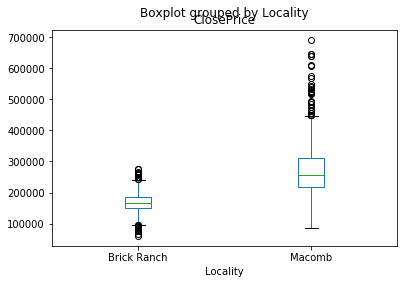

In [13]:
# Range Statistics for Closing Prices - by Locality
realestate2.boxplot(by ='Locality', column =['ClosePrice'], grid = False) 

Property price range is significantly different for each of these two localities. So, we will proceed to perform the analysis separately.

In [150]:
brick_ranch_df = realestate2.loc[realestate2['Locality']=='Brick Ranch']
len(brick_ranch_df)

1781

## Missing Values

In [88]:
# Check if missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

missing_values_table(brick_ranch_df)

Your selected dataframe has 22 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Water_Frontage_Feet,1781,100.0
Out_Buildings,1545,86.7
Year_Remodeled,1509,84.7
Seller_Concession_Amount,1290,72.4


In [270]:
# Missing Value Treatment
brick_ranch_df['BasementType'].fillna(('NA'), inplace=True)
brick_ranch_df['Garage_Size'].fillna(('NA'), inplace=True)
brick_ranch_df['Seller_Concession_YN'].fillna((False), inplace=True)

## Analytics Feature Type 

We need to understand feature type to perform relevant analysis.

In [156]:
# Find Continuous and Categorical Features
def featureType(df):
    import numpy as np 
    from pandas.api.types import is_numeric_dtype

    columns = df.columns
    rows= len(df)
    colTypeBase=[]
    colType=[]
    for col in columns:
        try:
            try:
                uniq=len(np.unique(df[col]))
            except:
                 uniq=len(df.groupby(col)[col].count())
            if rows>10:
                if is_numeric_dtype(df[col]):
                    
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Binary')
                    elif rows/uniq>3 and uniq>5:
                        colType.append('Continuous')
                        colTypeBase.append('Continuous')
                    else:
                        colType.append('Continuous-Ordinal')
                        colTypeBase.append('Ordinal')
                else:
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Category-Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Category-Binary')
                    else:
                        colType.append('Categorical-Nominal')
                        colTypeBase.append('Nominal')
            else:
                if is_numeric_dtype(df[col]):
                    colType.append('Numeric')
                    colTypeBase.append('Numeric')
                else:
                    colType.append('Non-numeric')
                    colTypeBase.append('Non-numeric')
        except:
            colType.append('Issue')
                
    # Create dataframe    
    df_out =pd.DataFrame({'Feature':columns,
                          'BaseFeatureType':colTypeBase,
                        'AnalysisFeatureType':colType})
    return df_out
featureType(brick_ranch_df)    

,Feature,BaseFeatureType,AnalysisFeatureType
0,Locality,Category-Unary,Unary
1,Close_Date,Nominal,Categorical-Nominal
2,ClosePrice,Continuous,Continuous
3,Acreage,Continuous,Continuous
4,ArchitectureLevel,Category-Unary,Unary
5,BasementType,Nominal,Categorical-Nominal
6,Basement_YN,Binary,Binary
7,Baths_Full,Ordinal,Continuous-Ordinal
8,Baths_Half,Ordinal,Continuous-Ordinal
9,Beds_Total,Ordinal,Continuous-Ordinal


## Analysis - Categorical Features 

In [89]:
brick_ranch_df.columns

Index(['Locality', 'Close_Date', 'ClosePrice', 'Acreage', 'ArchitectureLevel',
       'BasementType', 'Basement_YN', 'Baths_Full', 'Baths_Half', 'Beds_Total',
       'Est_Fin_Abv_Grd_SqFt', 'Garage_Size', 'Garage_YN', 'Out_Buildings',
       'Ownership', 'Pool_YN', 'Seller_Concession_Amount',
       'Seller_Concession_YN', 'Water_Frontage_Feet', 'Waterfront_YN',
       'Year_Built', 'Year_Remodeled'],
      dtype='object')

In [ ]:
# Level Grouping for Categorical Variables
# Condesnse levels: if levels are more than 5, combine others into the top 5 based on nearest value of Target Variable & create a new variable


In [139]:
# Overall statistics for Closed Price
brick_ranch_df['ClosePrice'].mean()

168994.12862998317

### Summary Statistics

In [136]:
def catVarStats(df, feature, label):    
    import numpy as np
    out_df =df.groupby(feature).agg(
    # Counts
    counts=(label, lambda x: len(x) ),
    # Percent
    percent = (label, lambda x: (len(x)*100/ len(df[label]))),
    # Min
    min_LabelVar=(label, min),
        # Max
    max_LabelVar=(label, max),
    # Mean
    mean_LabelVar=(label, np.mean),
    # Median
    median_LabelVar=(label, np.median)
   
    ).reset_index()
    # sort based on counts
    out_df=out_df.sort_values(by='counts', ascending=False)
    return out_df

catVarStats(brick_ranch_df,'BasementType',"ClosePrice") 

,BasementType,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
6,Finished,749.0,42.055025,98000.0,275000.0,173082.882630,169900.0
15,Partially Finished,421.0,23.638405,60000.0,240000.0,167077.154394,165000.0
14,NA,312.0,17.518248,66000.0,250000.0,163820.852564,164000.0
19,Unfinished,229.0,12.857945,75000.0,275000.0,165451.205240,165000.0
7,"Finished, Interior Access Only",14.0,0.786075,133650.0,219500.0,173239.285714,167450.0
13,"Interior Access Only, Unfinished",8.0,0.449186,118000.0,240000.0,179300.000000,166250.0
12,"Interior Access Only, Partially Finished",8.0,0.449186,150000.0,179900.0,166737.500000,169500.0
9,"Finished, Partially Finished",8.0,0.449186,130000.0,186000.0,165875.000000,172500.0
1,"Daylight, Finished",6.0,0.336889,163000.0,227900.0,191066.666667,189000.0
11,Interior Access Only,4.0,0.224593,120000.0,178000.0,153125.000000,157250.0


42% of the houses have **Finished** basement and these have higher mean price 173k compared to overall sample mean of 169k.

### Basement Type

In [ ]:
brick_ranch_df['BasementType_1']  = np.where(brick_ranch_df['BasementType']=='Finished', 'Finished','All Other')

In [331]:
brick_ranch_df['BasementType_2']  = np.where(brick_ranch_df['BasementType']=='Finished', 1,0)

In [153]:
catVarStats(brick_ranch_df,'BasementType_1',"ClosePrice") 

,BasementType_1,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
0,All Other,1032.0,57.944975,60000.0,275000.0,166026.612403,165000.0
1,Finished,749.0,42.055025,98000.0,275000.0,173082.882630,169900.0


In [310]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [311]:
# ANOVA - Analysis
BasementType_lm = ols('ClosePrice ~ C(BasementType_1, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(BasementType_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                              sum_sq      df          F        PR(>F)
C(BasementType_1, Sum)  2.160966e+10     1.0  25.430743  5.052685e-07
Residual                1.511698e+12  1779.0        NaN           NaN


F statistics and P Value suggest that the relationship between Basement Type and Close Price is significant.

### Garage Size

In [154]:
catVarStats(brick_ranch_df,'Garage_Size',"ClosePrice") 

,Garage_Size,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
2,2 Car,1520.0,85.345312,66000.0,275000.0,171274.128349,169900.0
6,2.5 Car,148.0,8.309938,60000.0,259900.0,165310.209459,165000.0
0,1 Car,50.0,2.807412,87000.0,225000.0,144263.980000,147000.0
11,No Garage,31.0,1.740595,75000.0,205000.0,132226.064516,142800.0
1,1.5 Car,9.0,0.505334,116250.0,171000.0,151972.222222,159500.0
7,3 Car,9.0,0.505334,100000.0,176500.0,149155.555556,153000.0
8,4 Car,5.0,0.280741,157000.0,163100.0,160940.000000,162500.0
10,NA,4.0,0.224593,99000.0,148000.0,129750.000000,136000.0
4,"2 Car, 3 Car",2.0,0.112296,146900.0,147000.0,146950.000000,146950.0
3,"2 Car, 2.5 Car",1.0,0.056148,165000.0,165000.0,165000.000000,165000.0


Garage Size **2 Car** is for 85% of the properties and these have mean as 171k compared to overall sample mean of 169k. But when we look at **2.5 Car** or **3 Car**, the average prices are going down. So, we may conclude that for the current sample, the garage size is not playing a significant role.

### Out Buildings

In [138]:
catVarStats(brick_ranch_df,'Out_Buildings',"ClosePrice") 

,Out_Buildings,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
4,Shed,226.0,12.689500,80000.0,275000.0,177673.903053,175000.0
0,Garage,3.0,0.168445,160000.0,238000.0,192666.666667,180000.0
2,Second Garage,2.0,0.112296,172000.0,179900.0,175950.000000,175950.0
5,"Shed, Second Garage",2.0,0.112296,164000.0,186900.0,175450.000000,175450.0
1,"Kennel, Pole Barn, Second Garage",1.0,0.056148,195000.0,195000.0,195000.000000,195000.0
3,"Second Garage, Shed",1.0,0.056148,183000.0,183000.0,183000.000000,183000.0
6,Silo,1.0,0.056148,275000.0,275000.0,275000.000000,275000.0


Data is available for only 13% of the properties. So, we may have to check whether having "out Building" plays any role in average prices.

In [268]:
brick_ranch_df['Out_Buildings_1']  = np.where(brick_ranch_df['Out_Buildings'].isnull(), 'Not Available','Available')

In [269]:
catVarStats(brick_ranch_df,'Out_Buildings_1',"ClosePrice") 

,Out_Buildings_1,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
1,Not Available,1545.0,86.749017,60000.0,265000.0,167566.628479,165000.0
0,Available,236.0,13.250983,80000.0,275000.0,178339.415636,175000.0


In [326]:
brick_ranch_df['Out_Buildings_2']  = np.where(brick_ranch_df['Out_Buildings'].isnull(), 0,1)

In [312]:
# ANOVA - Analysis
Out_Buildings_lm = ols('ClosePrice ~ C(Out_Buildings_1, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(Out_Buildings_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                               sum_sq      df          F        PR(>F)
C(Out_Buildings_1, Sum)  2.375925e+10     1.0  28.000241  1.363197e-07
Residual                 1.509548e+12  1779.0        NaN           NaN


Based on summary statistics, it shows that having out building plays a role in average pricing of a property

### Ownership

In [155]:
catVarStats(brick_ranch_df,'Ownership',"ClosePrice") 

,Ownership,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
5,Private - Owned,1750.0,98.259405,60000.0,275000.0,169639.082909,167000.0
0,Bank - Owned,16.0,0.898372,77608.0,173000.0,132721.750000,132500.0
3,Fannie MAE/Freddie MAC,7.0,0.393038,87900.0,156900.0,127000.000000,130000.0
4,Government - Owned,4.0,0.224593,95000.0,156000.0,125650.000000,125800.0
2,Corporate/Relocation,3.0,0.168445,112000.0,200000.0,141666.666667,113000.0
1,Broker/Agent Owned,1.0,0.056148,170000.0,170000.0,170000.000000,170000.0


98% of all the properies are Private Owned. So, this information is of less use.

### Baths

In [157]:
catVarStats(brick_ranch_df,'Baths_Full',"ClosePrice") 


,Baths_Full,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
0,1,1380.0,77.484559,60000.0,259900.0,165127.339855,164900.0
1,2,382.0,21.448624,66000.0,275000.0,181397.419084,175000.0
2,3,19.0,1.066816,140000.0,260000.0,200473.684211,205000.0


In [313]:
# ANOVA - Analysis
Baths_Full_lm = ols('ClosePrice ~ C(Baths_Full, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(Baths_Full_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                          sum_sq      df          F        PR(>F)
C(Baths_Full, Sum)  9.822962e+10     2.0  60.851159  2.740788e-26
Residual            1.435078e+12  1778.0        NaN           NaN


In [158]:
catVarStats(brick_ranch_df,'Baths_Half',"ClosePrice") 

,Baths_Half,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
1,1,1193.0,66.984840,60000.0,275000.0,170671.966471,169900.0
0,0,567.0,31.836047,66000.0,262500.0,165269.113034,163000.0
2,2,21.0,1.179113,146000.0,217000.0,174252.380952,170000.0


In [314]:
# ANOVA - Analysis
Baths_Half_lm = ols('ClosePrice ~ C(Baths_Half, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(Baths_Half_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                          sum_sq      df         F    PR(>F)
C(Baths_Half, Sum)  1.180664e+10     2.0  6.898521  0.001037
Residual            1.521501e+12  1778.0       NaN       NaN


### Bed Rooms

In [159]:
catVarStats(brick_ranch_df,'Beds_Total',"ClosePrice") 

,Beds_Total,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
1,3,1721.0,96.631106,60000.0,275000.0,169107.812371,166500.0
2,4,38.0,2.133633,99000.0,235000.0,174000.000000,167500.0
0,2,21.0,1.179113,77608.0,215000.0,149452.285714,141000.0
3,5,1.0,0.056148,193500.0,193500.0,193500.000000,193500.0


In [315]:
# ANOVA - Analysis
Beds_Total_lm = ols('ClosePrice ~ C(Beds_Total, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(Beds_Total_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                          sum_sq      df         F    PR(>F)
C(Beds_Total, Sum)  9.594568e+09     3.0  3.729826  0.010904
Residual            1.523713e+12  1777.0       NaN       NaN


### Seller Concession Amount

In [264]:
# Missing value replaced with -99
import warnings
warnings.filterwarnings('ignore')
brick_ranch_df['Seller_Concession_Amount'].fillna(-99)

print("Missing Counts",brick_ranch_df['Seller_Concession_Amount'].isnull().sum())

brick_ranch_df['Seller_Concession_Amount_1']  = np.where(brick_ranch_df['Seller_Concession_Amount'].isnull(), -99,brick_ranch_df['Seller_Concession_Amount'])
# Missing values after treatment - validation
print("Missing values now - after treatment",brick_ranch_df['Seller_Concession_Amount_1'].isnull().sum())

Missing Counts 0
Missing values now - after treatment 0


#### Converting to Groups
Since 72% of the rows does not have seller concession amount populated, we are creating groups to see the average prices by seller amount. We may want to see % of the price.


In [318]:
def contVarStats(df, feature, label):    
    import numpy as np
    df1=df
    df1.drop(['feature_cuts'], axis = 1) 
    # Bin the feaure
    df1['feature_cuts'] = pd.qcut(df1[feature], q=10, precision=0) 
    out_df =df1.groupby('feature_cuts').agg(
    # Counts
    counts=(label, lambda x: len(x) ),
    # Percent
    percent = (label, lambda x: (len(x)*100/ len(df[label]))),
    # Min
    min_LabelVar=(label, min),
        # Max
    max_LabelVar=(label, max),
    # Mean
    mean_LabelVar=(label, np.mean),
    # Median
    median_LabelVar=(label, np.median)
   
    ).reset_index()
    return out_df


#contVarStats(brick_ranch_df,'Seller_Concession_Amount',"ClosePrice") 

Looking at the average prices, above 4800 concession amount, the average price of the properies are significant. It makes sense as higher property price can afford to give higher concession amount.

In [266]:
# drop columns
#brick_ranch_df.drop(['Seller_Concession_Amount_cuts','feature_cuts','Seller_Concession_Amount_1'], axis = 1) 
# Fill NA
brick_ranch_df['Seller_Concession_Amount']=brick_ranch_df['Seller_Concession_Amount'].fillna(-99)
bin_labels = ['No Information', '1-4800', '>5000']
bin_cut = [-100, 1, 4800,100000]
brick_ranch_df['Seller_Concession_Amount_cuts'] = pd.cut(brick_ranch_df['Seller_Concession_Amount'],
                              bins=bin_cut, labels=bin_labels)

  Seller_Concession_Amount_cuts     ClosePrice
0                No Information  169012.966718
1                        1-4800  166350.268702
2                         >5000  174806.993333


Text(0, 0.5, 'Price')

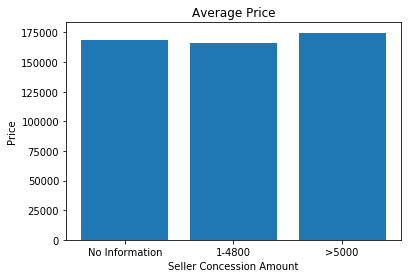

In [267]:
df_grp = brick_ranch_df.groupby(['Seller_Concession_Amount_cuts'])['ClosePrice'].mean().reset_index()
print(df_grp)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()    
ax.bar(df_grp['Seller_Concession_Amount_cuts'], df_grp['ClosePrice'])
plt.title('Average Price')
plt.xlabel('Seller Concession Amount')
plt.ylabel('Price')  

It seems having seller concession of over $5000 is only signficantly related to closing price. We may have to test statistically. Based on ANOVA F statistics, we can say that there is some evidence of relationship

In [316]:
# ANOVA - Analysis
Seller_Concession_Amount_cuts_lm = ols('ClosePrice ~ C(Seller_Concession_Amount_cuts, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(Seller_Concession_Amount_cuts_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                                             sum_sq      df         F  \
C(Seller_Concession_Amount_cuts, Sum)  7.438476e+09     2.0  4.333797   
Residual                               1.525869e+12  1778.0       NaN   

                                         PR(>F)  
C(Seller_Concession_Amount_cuts, Sum)  0.013256  
Residual                                    NaN  


### Water Frontage

For this particular file, all the observation has missing values. So, this feature is not relevant

### Year Remodeled

We may have to find years since modelled or whether a house is remodeled or not.

In [280]:
print("Properties that has missing year remodeled are: ", brick_ranch_df['Year_Remodeled'].isnull().sum())

Properties that has missing year remodeled are:  1509


% properties which were remodeled are:

In [286]:
np.round((len(brick_ranch_df['Year_Remodeled'])-brick_ranch_df['Year_Remodeled'].isnull().sum())*100/len(brick_ranch_df['Year_Remodeled']),2)

15.27

In [287]:
brick_ranch_df['is_remodeled'] = np.where(brick_ranch_df['Year_Remodeled'].isnull(),0,1)

In [288]:
catVarStats(brick_ranch_df,'is_remodeled',"ClosePrice") 

,is_remodeled,counts,percent,min_LabelVar,max_LabelVar,mean_LabelVar,median_LabelVar
0,0,1509.0,84.727681,60000.0,275000.0,167385.948370,165000.0
1,1,272.0,15.272319,100000.0,275000.0,177915.981618,175000.0


In [317]:
# ANOVA - Analysis
is_remodeled_lm = ols('ClosePrice ~ C(is_remodeled, Sum)', data=brick_ranch_df).fit()
table = sm.stats.anova_lm(is_remodeled_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

                            sum_sq      df          F        PR(>F)
C(is_remodeled, Sum)  2.555370e+10     1.0  30.150833  4.573140e-08
Residual              1.507753e+12  1779.0        NaN           NaN


Data shows is that the remodeled properties has higher prices attached to it.

## Continuous Variables

Now we are left wit continuous variables. There are : Acreage, and Est_Fin_Abv_Grd_SqFt. Now we want to understand correlation between these variables and the property prices

In [291]:
# missing values
print("Acreage has # of missig rows",brick_ranch_df['Acreage'].isnull().sum())
print("Above Ground Sq Foot has # of missig rows",brick_ranch_df['Est_Fin_Abv_Grd_SqFt'].isnull().sum())


Acreage has # of missig rows 0
Above Ground Sq Foot has # of missig rows 0


### Acreage

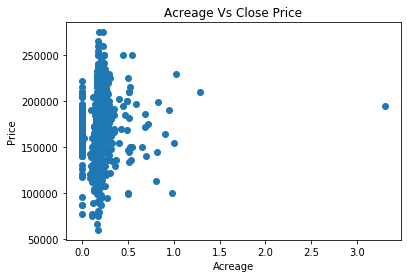

In [292]:
# Scatter Plot to see the relationship:Acreage

# Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(brick_ranch_df['Acreage'], brick_ranch_df['ClosePrice'])
plt.title('Acreage Vs Close Price')
plt.xlabel('Acreage')
plt.ylabel('Price')
plt.show()

Clear case of outlier. We may need to see the distribution and treat this variable.

In [300]:
# Outlier Identification
brick_ranch_df['Acreage'].quantile([.01, .05, .95, .99,1]) 

0.01    0.00
0.05    0.11
0.95    0.26
0.99    0.50
1.00    0.50
Name: Acreage, dtype: float64

In [299]:
# Capping Values
#brick_ranch_df['Acreage'] = brick_ranch_df['Acreage'].replace(['old value'],'new value')
brick_ranch_df.loc[brick_ranch_df['Acreage'] > 0.5, 'Acreage'] = 0.5

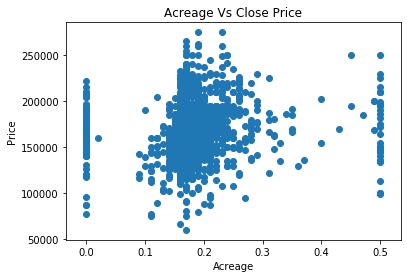

In [301]:
import matplotlib.pyplot as plt
plt.scatter(brick_ranch_df['Acreage'], brick_ranch_df['ClosePrice'])
plt.title('Acreage Vs Close Price')
plt.xlabel('Acreage')
plt.ylabel('Price')
plt.show()

Data suggests that there is a poor relationship between Acreage and Close Price

### Above Ground Living Area

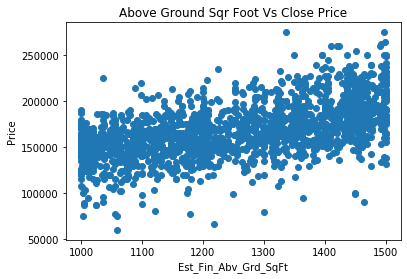

In [295]:
# Scatter Plot to see the relationship:Ground Square Feet

# Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(brick_ranch_df['Est_Fin_Abv_Grd_SqFt'], brick_ranch_df['ClosePrice'])
plt.title('Above Ground Living Area Vs Close Price')
plt.xlabel('Est_Fin_Abv_Grd_SqFt')
plt.ylabel('Price')
plt.show()

Very strong correlation between price and Above Ground Living Area.

### Correlation Analysis

In [304]:
brick_ranch_df_1 = brick_ranch_df.loc[:,['ClosePrice','Est_Fin_Abv_Grd_SqFt','Acreage']]

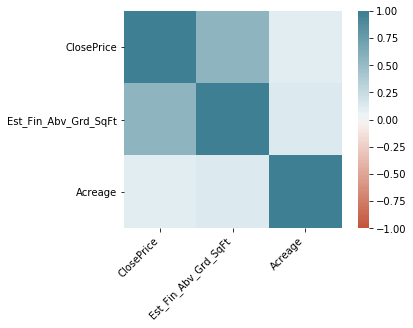

In [305]:
# Correlation Plot
import seaborn as sns

corr = brick_ranch_df_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [307]:
brick_ranch_df['Est_Fin_Abv_Grd_SqFt'].corr(brick_ranch_df['ClosePrice'])

0.5592605273927778

Good level of correlation between Above Ground Living Area and Close Prices

In [308]:
brick_ranch_df['Acreage'].corr(brick_ranch_df['ClosePrice'])

0.11295144370600407

As value - 0.11  is very close 1, we can conclude that they are not correlated 

# Regression Analysis

In [324]:
from statsmodels.api import add_constant
import statsmodels.api as sm


In [333]:
brick_ranch_df_features = brick_ranch_df.loc[:,['BasementType_2','Out_Buildings_2','Baths_Full','Baths_Half','Beds_Total','is_remodeled','Acreage','Est_Fin_Abv_Grd_SqFt']]
# Simple
simpleOLS = sm.OLS(brick_ranch_df['ClosePrice'], add_constant(brick_ranch_df['BasementType_2'])).fit()
simpleOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     25.43
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           5.05e-07
Time:                        18:24:28   Log-Likelihood:                -20835.
No. Observations:                1781   AIC:                         4.167e+04
Df Residuals:                    1779   BIC:                         4.169e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.66e+05    907.412    182.967      0.000    1.64e+05    1.68e+05
BasementType_2  7056.2702   1399.251      5.043      0.000    4311.921    9800.619
==============================================================================
Omnibus:                       31.180   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.731
Skew:                           0.238   Prob(JB):                     3.89e-09
Kurtosis:                       3.543   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
brick_ranch_df_features2 = brick_ranch_df.loc[:,['BasementType_2','Out_Buildings_2','Baths_Full','is_remodeled','Est_Fin_Abv_Grd_SqFt']]

MultipleOLS = sm.OLS(brick_ranch_df['ClosePrice'], add_constant(brick_ranch_df_features2)).fit()
MultipleOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ClosePrice   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     212.0
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.46e-177
Time:                        18:27:16   Log-Likelihood:                -20431.
No. Observations:                1781   AIC:                         4.087e+04
Df Residuals:                    1775   BIC:                         4.091e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.583e+04   4569.314      5.653      0.000    1.69e+04    3.48e+04
BasementType_2        6196.0273   1130.229      5.482      0.000    3979.308    8412.746
Out_Buildings_2       4674.5148   1638.753      2.852      0.004    1460.426    7888.603
Baths_Full            1.078e+04   1251.994      8.607      0.000    8319.915    1.32e+04
is_remodeled          8543.6608   1537.739      5.556      0.000    5527.690    1.16e+04
Est_Fin_Abv_Grd_SqFt    99.7114      3.539     28.176      0.000      92.771     106.652
==============================================================================
Omnibus:                       28.980   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.497
Skew:                          -0.133   Prob(JB):                     8.00e-11
Kurtosis:                       3.746   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""